In [1]:
!pip install lightning wandb

In [2]:
from os.path import exists
import pickle

okt_train_file = "okt_stem_train_dataset.pkl"
okt_test_file = "okt_stem_test_dataset.pkl"

if exists(okt_train_file):
    print(f"{okt_train_file} already exists")
    with open(okt_train_file, "rb") as file:
        tokenized_train_dataset = pickle.load(file)
    with open(okt_test_file, "rb") as file:
        tokenized_test_dataset = pickle.load(file)

okt_stem_train_dataset.pkl already exists


In [3]:
tokenized_train_dataset[:3]

[(['아', '더빙', '진짜', '짜증나다', '목소리'], '0'),
 (['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], '1'),
 (['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'], '0')]

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 12.975366666666666


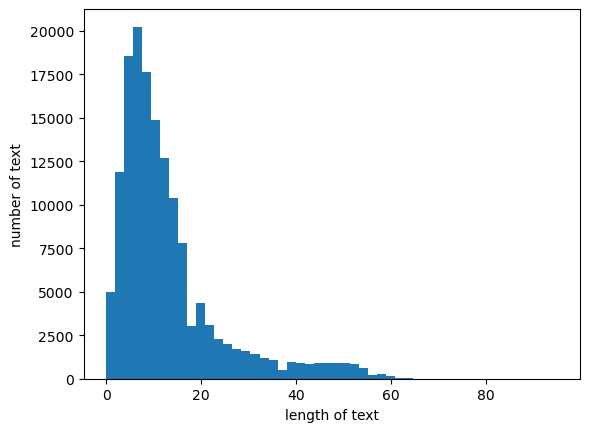

In [4]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(text) for text, _ in tokenized_train_dataset))
print('리뷰의 평균 길이 :',sum(map(lambda x: len(x[0]), tokenized_train_dataset))/len(tokenized_train_dataset))

plt.hist([len(text) for text, _ in tokenized_train_dataset], bins=50)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()

In [5]:
with open("kor_stopword.txt", "r") as file:
    kor_stopwords = [stopword.strip() for stopword in file.readlines()]

In [6]:
kor_stopwords = set(kor_stopwords)  # set대신 list를 사용하면 어떻게 될까?
# hashing으로 인해 속도가 매우 빠르다

In [7]:
word2vec_train_datas = []
for train_text, _ in tokenized_train_dataset:
    word2vec_train_datas.append([word for word in train_text if word not in kor_stopwords])

리뷰의 최대 길이 : 95
리뷰의 평균 길이 : 9.96158


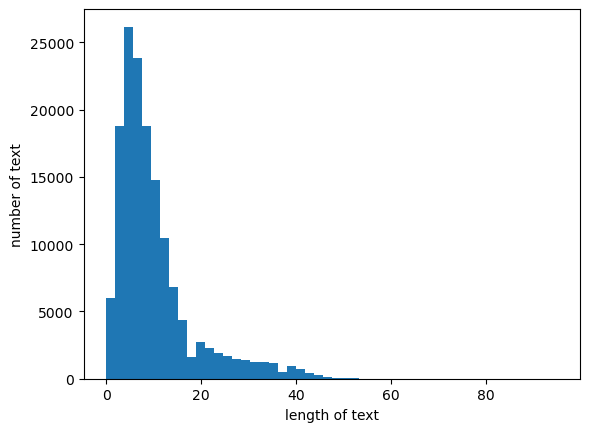

In [8]:
print('리뷰의 최대 길이 :',max(len(text) for text in word2vec_train_datas))
print('리뷰의 평균 길이 :',sum(map(len, word2vec_train_datas))/len(word2vec_train_datas))

plt.hist([len(text) for text in word2vec_train_datas], bins=50)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()
# 3토큰정도 뷸용어가 잇엇다

In [9]:
from gensim.models import Word2Vec

CBOW_W2V = Word2Vec(sentences = word2vec_train_datas,
                    vector_size = 32, # 임베딩 크기
                    window = 5,
                    min_count = 1, # 최소몇번나온단어학습?
                    workers = 4,
                    sg = 0 # 가운데단아로 주변단어 맞추면 sg 근데 0이니깐 cbow(주변단어로 가운데 단어맞추기)
                    )

In [10]:
print(type(CBOW_W2V.wv.vectors)) # w+u 1/2 잇음
print(CBOW_W2V.wv.vectors.shape)

<class 'numpy.ndarray'>
(46927, 32)


In [11]:
print(CBOW_W2V.wv.most_similar("히어로"))

[('물의', 0.9118835926055908), ('슬래셔', 0.907971978187561), ('홍콩', 0.9044898748397827), ('sf', 0.8982486724853516), ('틴', 0.8888711333274841), ('완성형', 0.8878781795501709), ('블랙', 0.8825926780700684), ('헐리웃', 0.8825657963752747), ('느와르', 0.8813360929489136), ('하이', 0.88096022605896)]


In [12]:
SkipGram_W2V = Word2Vec(sentences = word2vec_train_datas, vector_size = 32, window = 5, min_count = 1, workers = 4, sg = 1) #skgram, loss연산때문에더 오래걸림

In [13]:
print(type(SkipGram_W2V.wv.vectors))
print(SkipGram_W2V.wv.vectors.shape)

<class 'numpy.ndarray'>
(46927, 32)


In [14]:
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]))
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]-CBOW_W2V.wv["공포"]))
print(CBOW_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"]-CBOW_W2V.wv["공포"]+CBOW_W2V.wv["액션"]))

[('공포영화', 1.0), ('애니', 0.821456789970398), ('코미디', 0.8058713674545288), ('공포', 0.7928827404975891), ('스릴러', 0.7897058129310608), ('공포물', 0.7850384712219238), ('액션영화', 0.7843911051750183), ('만화', 0.7723418474197388), ('다큐', 0.756955087184906), ('영화', 0.7523472905158997)]
[('생신', 0.6685481667518616), ('동예', 0.5853976607322693), ('보러갔뎈', 0.5777990221977234), ('트레쉬', 0.5722613334655762), ('양리칭', 0.5703994631767273), ('때껏', 0.5685007572174072), ('맹한것', 0.5577472448348999), ('듭시', 0.5549449324607849), ('창궐', 0.5510196685791016), ('희망버스', 0.5428675413131714)]
[('액션', 0.8393305540084839), ('액션영화', 0.7610765099525452), ('좀비', 0.7370038032531738), ('짜장', 0.7041727900505066), ('호러', 0.7020161151885986), ('공포물', 0.6861878037452698), ('캐피탈', 0.6795675754547119), ('그래픽', 0.6770871877670288), ('견자단', 0.6756500005722046), ('에로영화', 0.6714422106742859)]


In [15]:
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]-SkipGram_W2V.wv["영화"]+SkipGram_W2V.wv["사람"]))
print(SkipGram_W2V.wv.most_similar(SkipGram_W2V.wv["공포영화"]-SkipGram_W2V.wv["공포"]+SkipGram_W2V.wv["액션"])) # cbow보다 표현력이 좋음

[('공포영화', 1.0000001192092896), ('공포물', 0.9374751448631287), ('재난영화', 0.9055764675140381), ('공포', 0.9034965634346008), ('중국영화', 0.8878097534179688), ('국산', 0.8852449655532837), ('호러영화', 0.8851075768470764), ('좀비', 0.8847965598106384), ('스릴러', 0.8837276697158813), ('sf', 0.8773746490478516)]
[('공포영화', 0.8807488679885864), ('사람', 0.8649839758872986), ('괴물', 0.836514413356781), ('한국인', 0.8349186778068542), ('잔인하다', 0.8332821130752563), ('멍청이', 0.8312879800796509), ('벌레', 0.8303414583206177), ('초능력', 0.8288736939430237), ('끔찍하다', 0.8259201049804688), ('개독', 0.824404776096344)]
[('액션영화', 0.9095801115036011), ('액션', 0.8924511075019836), ('호러물', 0.8746622204780579), ('스타뎀', 0.8717531561851501), ('유명배우', 0.8703081607818604), ('탑', 0.8695226311683655), ('뎀', 0.8693880438804626), ('공포물', 0.8668188452720642), ('성룡', 0.8645274639129639), ('블록버스터', 0.8603566884994507)]


In [16]:
CBOW_W2V.save("CBOW_W2V.model")
SkipGram_W2V.save("SkipGram_W2V.model")

In [17]:
SkipGram_W2V = Word2Vec.load("SkipGram_W2V.model")

In [18]:
SkipGram_W2V.wv.most_similar(CBOW_W2V.wv["공포영화"])

[('만화영화', 0.6687706112861633),
 ('공포영화', 0.6628260612487793),
 ('스릴러', 0.6516444683074951),
 ('한국영', 0.6511425375938416),
 ('국산', 0.6483428478240967),
 ('무협', 0.6431922316551208),
 ('느와르', 0.6386662125587463),
 ('우리나라', 0.6327752470970154),
 ('재난영화', 0.6313568949699402),
 ('수작', 0.6308435797691345)]

In [19]:
from collections import Counter
token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

min_count = 1
vocab = {"[PAD]":0, "[UNK]":1}
vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count and token not in kor_stopwords:
        vocab[token] = vocab_idx
        vocab_idx += 1

In [20]:
print("공포영화" in SkipGram_W2V.wv.key_to_index)
print("[UNK]" in SkipGram_W2V.wv.key_to_index)
print("이영화" in SkipGram_W2V.wv.key_to_index)

True
False
True


In [21]:
# 둘다인덱스인데달라서 이제 맞춰줘야해. 서로인덱스가다르면 다른단어를가져와버림
print(SkipGram_W2V.wv.key_to_index["공포영화"])
print(vocab["공포영화"])

332
2458


In [22]:
import numpy as np

embedding_list = []

for token, idx in vocab.items():
    if token in CBOW_W2V.wv:
        embedding_list.append(SkipGram_W2V.wv[token])
    elif token == "[PAD]":
        embedding_list.append(np.zeros(SkipGram_W2V.wv.vectors.shape[1])) # 0 벡터를 패드자리에 넣어줘야함. 여긴 아무의미없는거라 0으로
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1])) # 그 자리에 단어가잇엇다라는 의미가 잇어야하기 때문에 랜덤초기화
    else:
        print(token)

# 나는 / 자연어처리 / 강사다. / [pad]
# 한국 / 기술 / 교육 / 대학교

In [23]:
print(len(embedding_list))
print(len(vocab))

25958
25958


In [24]:
embedding_loopup_matrix = np.vstack(embedding_list)

In [25]:
import torch
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix), freeze=False)
        self.fc1 = nn.Linear(32 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 32 * 100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

In [28]:
from torch.utils.data import Dataset, DataLoader

class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = int(self.data[index][1])
        tokens = self.data[index][0]

        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        if len(token_ids) > 100:
            token_ids = token_ids[:100]
        else:
            token_ids = token_ids[:100] + [0] * (100 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [29]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

def check_performance(vocab,train_data, test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP_test", name=wandb_log_name, group="Lec02")

    model = SentimentClassifier(len(vocab))
    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(test_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(max_epochs=1,
                     accelerator="gpu",
                     logger=wandb_logger
                     )

    trainer.fit(model=pl_model,
                train_dataloaders=train_loader,
                val_dataloaders=val_loader)

    trainer.test(dataloaders=test_loader)

    wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jaewoo010207 (jaewoogwak). Use `wandb login --relogin` to force relogin


In [30]:
check_performance(vocab, tokenized_train_dataset, tokenized_test_dataset, "okt_stem_vocab_with_SKipGram")

/Users/jaewoogwak/anaconda3/lib/python3.11/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 1.2 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.604     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/jaewoogwak/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/jaewoogwak/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 120, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jaewoogwak/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 130, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'SentimentDataset' on <module '__main__' (built-in)>
/Users/jaewoogwak/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/Users/jaewoogwak/anaconda3/lib/python3.11/site-packages/lightning/pytorch/tr

ValueError: `.test(ckpt_path="best")` is set but `ModelCheckpoint` is not configured to save the best model.

### 실습 문제
아래는 사전 학습된 GloVe embedding을 다운로드하고 처리하는 코드이다.

glove라는 dictionary는 단어를 key로, GloVe vector를 value로 가질 때

이를 이용하여 embedding lookup matrix를 만들고 기존 사용한 모델의 embedding layer에 추가해 학습을 진행하시오.

(기존에 사용한 모델의 경우 embedding의 크기가 32이므로 glove의 크기에 맞게 수정하여야 함)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip         # https://github.com/stanfordnlp/GloVe
!unzip glove.6B.zip

glove_path = "glove.6B.100d.txt"

glove = {}
with open(glove_path, "r") as file:
    for line in file:
        word, *vector = line.split()
        vector = np.array(vector)
        glove[word] = vector

--2024-03-27 02:10:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-27 02:10:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-27 02:10:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from requests import get
from os.path import exists


with open("train.txt", "r") as file:
    for i in range(5):
        print(file.readline())

with open("train.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    train_data = [line.split("\t") for line in lines if len(line) > 0]

with open("test.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    test_data = [line.split("\t") for line in lines if len(line) > 0]


with open("val.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    validation_data = [line.split("\t") for line in lines if len(line) > 0]

id	text	label

cv839_21467	assume nothing . the phrase is perhaps one of the most used of the 1990's , as first impressions and rumors are hardly ever what they seem to be . the phrase especially goes for oscar novak , an architect who is the main focus of three to tango , a delightful , funny romantic comedy about assumptions and being yourself . novak ( matthew perry ) , a shy , clumsy , chicago based architect , along with openly gay partner , peter steinberg ( oliver platt ) , fights for projects day in and day out . one of these is the job of restoring a popular building for charles newman ( dylan mcdermott ) , a rich , well-known businessman . charles immediately takes a liking to oscar , as he enjoys his personality and sense of humor . seeing oscar as someone he could trust , charles asks him to watch his girlfriend , an unpredictable , adventurous girl named amy post ( neve campbell ) , who makes a living by blowing glass . charles wants to know who she talks to , what she doe

In [60]:
tokenized_train_dataset[:1]

[(['아', '더빙', '진짜', '짜증나다', '목소리'], '0')]

In [108]:
train_data[1]

['cv034_29647',
 'plot : derek zoolander is a male model . he is also very dumb and impressionable . for that reason , he is secretly hired and trained ( so secret , that even he doesn\'t know about it ) by an underground fashion syndicate to assassinate the prime minister of malaysia , who wants to abolish child labor in his country . will zoolander fulfill the dirty deed ? will zoolander ever grace the world his new " look " ? is this a funny movie ? find out below . . . critique : there\'s a place in our world for " stupid comedies " . films which don\'t pretend to take themselves seriously , are based on idiotic premises and filled with dumb jokes . there\'s also a time for them and many would argue that this difficult period of our history , might be an ideal circumstance during which to " relax " by watching something so completely frivolous . well , if you\'re in the mood for some seriously mindless entertainment , ben stiller and his cast of many have assembled one of the more 

In [125]:
import wandb
from lightning.pytorch.loggers import WandbLogger

wandb.login()

def check_vocab_properties(vocab):
    print(f"Vocab size: {len(vocab)}")
    print(f"Vocab items: {list(vocab.items())[:5]}")


def check_performance(vocab,train_data, validation_data ,test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP", name=wandb_log_name, group="HW1")

    model = SentimentClassifier(len(vocab))
    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    val_dataset = SentimentDataset(validation_data, vocab)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(max_epochs=1,
                     accelerator="cpu",
                     logger=wandb_logger
                     )

    trainer.fit(model=pl_model,
                train_dataloaders=train_loader,
                val_dataloaders=val_loader)

    trainer.test(dataloaders=test_loader)

    wandb.finish()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [114]:
from collections import Counter
from tqdm import tqdm

whitespace_vocab = {"[PAD]":0, "[UNK]":1}
whitespace_vocab_idx = 2

tokenizer = lambda x: x.split() # 띄어쓰기 기준이니깐 split

tokenized_train_dataset = []
tokenized_validation_dataset = []
tokenized_test_dataset = []

for data in train_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_train_dataset.append((tokens, labels))

for data in validation_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_validation_dataset.append((tokens, labels))

for data in test_data:
    tokens = tokenizer(data[1])
    labels = data[2]
    tokenized_test_dataset.append((tokens, labels))

for tokens, _ in tokenized_train_dataset:
    for token in tokens:
        if token not in whitespace_vocab:
            whitespace_vocab[token] = whitespace_vocab_idx
            whitespace_vocab_idx += 1

In [115]:
check_vocab_properties(whitespace_vocab)

Vocab size: 43031
Vocab items: [('[PAD]', 0), ('[UNK]', 1), ('assume', 2), ('nothing', 3), ('.', 4)]


In [116]:
import numpy as np

embedding_list = []

for token, idx in whitespace_vocab.items():
    if token in glove:
        embedding_list.append(np.array(glove[token], dtype=float))
    elif token == "[PAD]":
        embedding_list.append(np.zeros(100)) # 0 벡터를 패드자리에 넣어줘야함. 여긴 아무의미없는거라 0으로
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, 100)) # 그 자리에 단어가잇엇다라는 의미가 잇어야하기 때문에 랜덤초기화
    else:
        embedding_list.append(np.random.uniform(-1, 1, 100))
        # print(token)

# 나는 / 자연어처리 / 강사다. / [pad]
# 한국 / 기술 / 교육 / 대학교

In [117]:
embedding_list[0:3]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.04215065,  0.50248285, -0.74916506,  0.49070644,  0.01038175,
        -0.46007985,  0.50266771, -0.31399388, -0.92013816,  0.85735   ,
        -0.81077668, -0.09218356,  0.14369032, -0.24537978, -0.40839011,
         0.35835383, -0.53872359, -0.4180027 ,  0.00965109, -0.03059938,
        -0.19906581, -0.43485604,  0.09406173,  0.64770757, -0.49110934,
        -0.62005978, -0.99682402,  0.06269437,  0.65069219,  0.48761665,
        -0.58512714,  0.49811351, -0.580922  ,  0.92054251, -0.56737011,
        -0.20729214,  0.7308128 , -0.08

In [118]:
embedding_loopup_matrix = np.vstack(embedding_list)

In [119]:
import torch
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [127]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix), freeze=False)
        self.fc1 = nn.Linear(100 * 100, 100)
        self.fc2 = nn.Linear(100, 2)

    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 100 * 100)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [128]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

In [129]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("val_loss", loss)
        self.validation_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_validation_epoch_end(self):
        outputs = self.validation_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_val_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("val_accuracy", accuracy)
        self.validation_step_outputs.clear()

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

In [130]:
from torch.utils.data import Dataset, DataLoader

class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
      # 토크나이징을 미리 해서 받음. 안하면 할때마다 여러번함
        label = int(self.data[index][1])
        tokens = self.data[index][0]

        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        if len(token_ids) > 100:
            token_ids = token_ids[:100]
        else:
            token_ids = token_ids[:100] + [0] * (100 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [131]:
check_performance(whitespace_vocab, tokenized_train_dataset, tokenized_validation_dataset, tokenized_test_dataset, "glove")

INFO: GPU available: True (cuda), used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name  | Type                | Params
----------------------------------------------
0 | model | SentimentClassifier | 5.3 M 
1 | loss  | CrossEntropyLoss    | 0     
----------------------------------------------
5.3 M     Trainable params
0         Non-trainable params
5.3 M     Total params
21.214    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type                | Params
----------------------------------------------
0 | mode

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP/buhfe81u/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP/buhfe81u/checkpoints/epoch=0-step=22.ckpt
INFO: Loaded model weights from the checkpoint at ./NLP/buhfe81u/checkpoints/epoch=0-step=22.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP/buhfe81u/checkpoints/epoch=0-step=22.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │     0.699048638343811     │
│       test_accuracy       │    0.5133333206176758     │
│         test_loss         │    0.6929808259010315     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
avg_val_loss,▁
epoch,▁█
test_accuracy,▁
test_loss,▁
trainer/global_step,▁█
val_accuracy,▁
val_loss,▁
avg_test_loss,0.69905
avg_val_loss,0.70044
epoch,1
